In [1]:
### SONG RECOMMENDER

In [2]:
import pickle
import config
import pandas as pd
import numpy as np
from time import sleep
import random
from sklearn import datasets # sklearn comes with some toy datasets to practise
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from matplotlib import pyplot
from sklearn.metrics import silhouette_score
import seaborn as sns # Import seaborn
import spotipy
import json
from spotipy.oauth2 import SpotifyClientCredentials


In [3]:
#Initialize SpotiPy with user credentias
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id= config.client_id,
                                                           client_secret= config.client_secret))


In [4]:
#import csv file 
myspotify_df = pd.read_csv('myspotify_playlist.csv')

In [5]:
#dropped the unamed column and the song duration column
myspotify_df = myspotify_df.drop(['key','Unnamed: 0','duration_ms', 'mode', 'instrumentalness', 'tempo', 'liveness'], axis=1)

# ['danceability','energy','loudness','speechiness','acousticness','valence]

In [6]:
#create a series for my id
song_id = myspotify_df['id']

In [7]:
#set the column ID as my new index
myspotify_df = myspotify_df.set_index('id')

In [8]:
#check for duplicates
myspotify_df = myspotify_df.drop_duplicates()

In [9]:
#check for null values
myspotify_df.isnull().sum()

danceability    0
energy          0
loudness        0
speechiness     0
acousticness    0
valence         0
dtype: int64

#### Scaling the features

In [10]:
#describe the features
myspotify_df.describe()

,danceability,energy,loudness,speechiness,acousticness,valence
count,14889.000000,14889.000000,14889.000000,14889.000000,14889.000000,14889.000000
mean,0.607313,0.688169,-7.143616,0.087801,0.205094,0.514611
std,0.163424,0.215816,4.060628,0.087100,0.272028,0.244858
min,0.065900,0.000707,-43.657000,0.022200,0.000001,0.026200
25%,0.500000,0.567000,-8.498000,0.037100,0.009670,0.327000
50%,0.619000,0.730000,-6.197000,0.052700,0.073200,0.515000
75%,0.727000,0.857000,-4.630000,0.096000,0.299000,0.710000
max,0.980000,0.999000,0.839000,0.940000,0.996000,0.997000


In [11]:
#using the standard scaler function
scaler = StandardScaler()

#fit the model to get the mean
scaler.fit(myspotify_df)

#transform the model
myspotify_df_scaled = scaler.transform(myspotify_df)

#scaler = StandardScaler()
#model = KMeans()

with open("Data/scaler.pickle", "wb") as f:
    pickle.dump(scaler,f)
    
def load(filename = "filename.pickle"): 
    try: 
        with open(filename, "rb") as f: 
            return pickle.load(f) 

    except FileNotFoundError: 
        print("File not found!") 

In [12]:
#putting the numpy array into a dataframe 
myspotify_df_scaled_df = pd.DataFrame(myspotify_df_scaled, columns = myspotify_df.columns)

In [13]:
#renaming my data frame 
music_df = myspotify_df_scaled_df

In [14]:
#describe my transformed dataframe
music_df.describe()

,danceability,energy,loudness,speechiness,acousticness,valence
count,1.488900e+04,1.488900e+04,1.488900e+04,1.488900e+04,1.488900e+04,1.488900e+04
mean,-2.537541e-16,-4.202465e-16,8.631837e-17,-7.776464e-17,6.033487e-16,1.666863e-16
std,1.000034e+00,1.000034e+00,1.000034e+00,1.000034e+00,1.000034e+00,1.000034e+00
min,-3.313053e+00,-3.185511e+00,-8.992355e+00,-7.531987e-01,-7.539642e-01,-1.994740e+00
25%,-6.566766e-01,-5.614628e-01,-3.335518e-01,-5.821253e-01,-7.184205e-01,-7.662292e-01
50%,7.151673e-02,1.938350e-01,2.331283e-01,-4.030149e-01,-4.848706e-01,1.589851e-03
75%,7.323981e-01,7.823185e-01,6.190422e-01,9.413136e-02,3.452185e-01,7.979979e-01
max,2.280574e+00,1.440308e+00,1.965923e+00,9.784465e+00,2.907540e+00,1.970147e+00


/Users/chuks/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

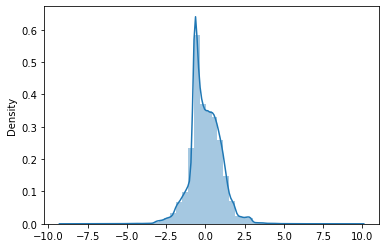

In [15]:
sns.distplot(music_df)

### Choosing K

In [16]:
rand_state = 123

Training a K-Means model with 2 clusters! 

Training a K-Means model with 3 clusters! 

Training a K-Means model with 4 clusters! 

Training a K-Means model with 5 clusters! 

Training a K-Means model with 6 clusters! 

Training a K-Means model with 7 clusters! 

Training a K-Means model with 8 clusters! 

Training a K-Means model with 9 clusters! 

Training a K-Means model with 10 clusters! 

Training a K-Means model with 11 clusters! 

Training a K-Means model with 12 clusters! 

Training a K-Means model with 13 clusters! 

Training a K-Means model with 14 clusters! 

Training a K-Means model with 15 clusters! 

Training a K-Means model with 16 clusters! 

Training a K-Means model with 17 clusters! 

Training a K-Means model with 18 clusters! 

Training a K-Means model with 19 clusters! 

Training a K-Means model with 20 clusters! 

Training a K-Means model with 21 clusters! 

Training a K-Means model with 22 clusters! 

Training a K-Means model with 23 clusters! 

Training a K-Means

Text(0.5, 1.0, 'Elbow Method showing the optimal k')

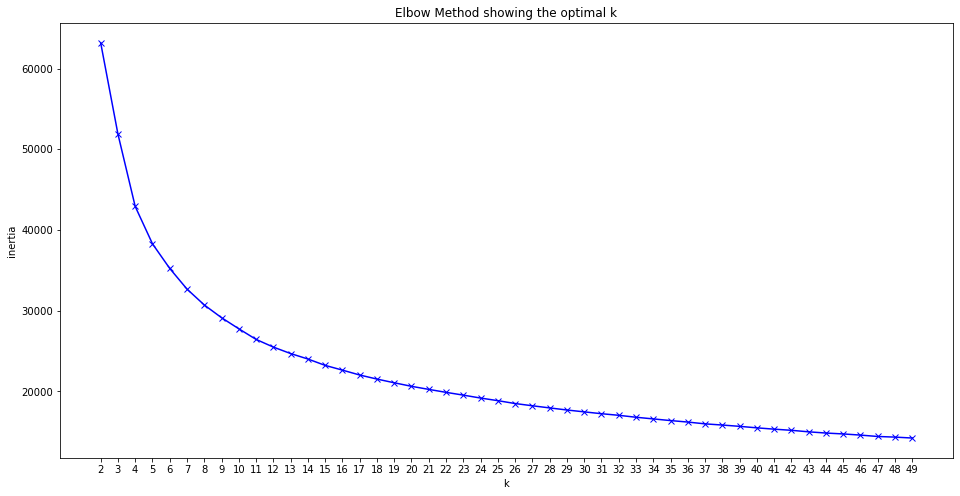

In [17]:
K = range(2, 50)
inertia = []

for k in K:
    print("Training a K-Means model with {} clusters! ".format(k))
    print()
    kmeans = KMeans(n_clusters=k,
                    random_state=rand_state)
    kmeans.fit(music_df)
    inertia.append(kmeans.inertia_)

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

### Silouhette

Text(0.5, 1.0, 'Silhouette Method showing the optimal k')

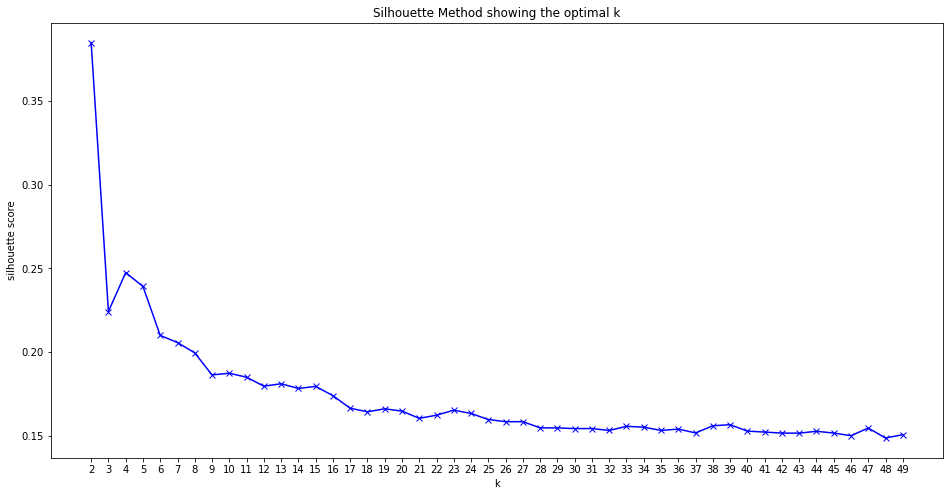

In [18]:
K = range(2, 50)
silhouette = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=123)
    kmeans.fit(music_df)
    
    filename = "kmeans_" + str(k) + ".pickle"
    with open(filename, "wb") as f:
        pickle.dump(kmeans,f)
    
    silhouette.append(silhouette_score(music_df, kmeans.predict(music_df)))


plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Silhouette Method showing the optimal k')

### Clustering the audio features with Kmeans  

In [19]:
no_clust = 20

kmeans = KMeans(n_clusters=no_clust, random_state=rand_state)
kmeans.fit(music_df)

KMeans(n_clusters=20, random_state=123)

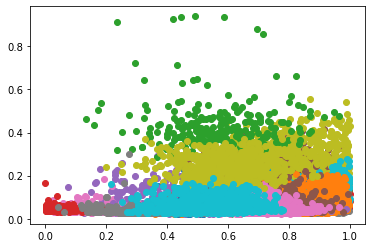

In [20]:
# assign a cluster to each example
labels = kmeans.predict(music_df)
# retrieve unique clusters
clusters = np.unique(labels)
# create scatter plot for samples from each cluster
for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = np.where(labels == cluster)
    # create scatter of these samples
    pyplot.scatter(myspotify_df.to_numpy()[row_ix, 1], myspotify_df.to_numpy()[row_ix, 3])
    # show the plot
pyplot.show()

In [21]:
clusters = kmeans.predict(music_df)
#clusters
pd.Series(clusters).value_counts().to_frame().sort_index()

,0
0,1025
1,759
2,1320
3,1089
4,527
5,652
6,393
7,1443
8,419
9,795


In [22]:
clusters

array([7, 0, 3, ..., 7, 7, 7], dtype=int32)

In [23]:
#myspotify_df = pd.DataFrame(X)
music_df["cluster"] = clusters

In [24]:
music_df.reset_index(inplace=True)
music_df['id'] = song_id

In [25]:
##Embed track player
from IPython.display import IFrame

#track_id = "1rfORa9iYmocEsnnZGMVC4"
track_id= 'spotify:track:3hgl7EQwTutSm6PESsB7gZ'
IFrame(src="https://open.spotify.com/embed/track/"+track_id,
       width="320",
       height="80",
       frameborder="0",
       allowtransparency="true",
       allow="encrypted-media",
      )

In [26]:
def play_song(track_id):
    return IFrame(src="https://open.spotify.com/embed/track/"+track_id,
       width="320",
       height="80",
       frameborder="0",
       allowtransparency="true",
       allow="encrypted-media",
      )

In [27]:
#find a similar song
def find_match():
        #asks user for an input
        enter_music = input('Enter a song: ')
        results = sp.search(q= enter_music,limit=5,market="GB")
        return results
    
    
#     except ValueError:
#         print("Sorry,no song chosen. retry")  
#         continue
#     else: break
        
#     if isinstance(enter_music, str): 
#         results = sp.search(q= enter_music,limit=5,market="GB")
#         return results
#     else: return 'No song in this market'
    

In [28]:
#get audio features of song
def audio_feat(x):
    return sp.audio_features(x)


In [29]:
#get song input from user
match = find_match()


Enter a song: despacito


In [38]:
#get id from the inputed song
track_id=match["tracks"]["items"][0]["id"]

In [39]:
#play song
play_song(track_id)

In [40]:
#get the audio features of the song
features = audio_feat(track_id)

In [41]:
#create a dataframe for our selected track 
mytrack_df=pd.DataFrame(features)    
# mytrack_df=mytrack_df[['danceability','energy','mode','loudness','speechiness','acousticness',
#     'instrumentalness','liveness','valence', 'tempo']]
mytrack_df=mytrack_df[['danceability','energy','loudness','speechiness','acousticness','valence']]

In [42]:
#transform user track using the scaler function
mytrack_df = scaler.transform(mytrack_df)

In [43]:
#using kmeans predict, predict the cluster of mytrack_df
mytrack_df = kmeans.predict(mytrack_df)

/Users/chuks/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


In [44]:
def recommender():
    rec_match = music_df.loc[music_df.cluster==mytrack_df[0]].sample()
    rec_match_id = rec_match.iloc[0]['id']
    return play_song(rec_match_id)

In [45]:
recommender()